# 1. Loading the Libraries and Datasets

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

# df = pd.read_csv('/content/2015-2024-monthly-tourist-arrivals-sl-csv.csv') #for-colab
df = pd.read_csv('../dataset/2015-2024-monthly-tourist-arrivals-sl-csv.csv') #for-codespace
df.head()


,Year,Month,Arrivals,PercentageChange
0,2014,January,146575,6.6
1,2014,February,141878,16.7
2,2014,March,133048,18.0
3,2014,April,112631,8.5
4,2014,May,90046,26.1


# 2. Dataset Cleaning

In [4]:
print(df.isnull().sum())

df['Date'] = pd.to_datetime(df['Year'].astype(str) + '-' + df['Month'], format='%Y-%B')

df = df.sort_values('Date')

df = df.dropna(subset=['Arrivals'])

df.info()

Year                0
Month               0
Arrivals            0
PercentageChange    8
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128 entries, 0 to 127
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Year              128 non-null    int64         
 1   Month             128 non-null    object        
 2   Arrivals          128 non-null    int64         
 3   PercentageChange  120 non-null    float64       
 4   Date              128 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 5.1+ KB


# 3. Visualization the Data

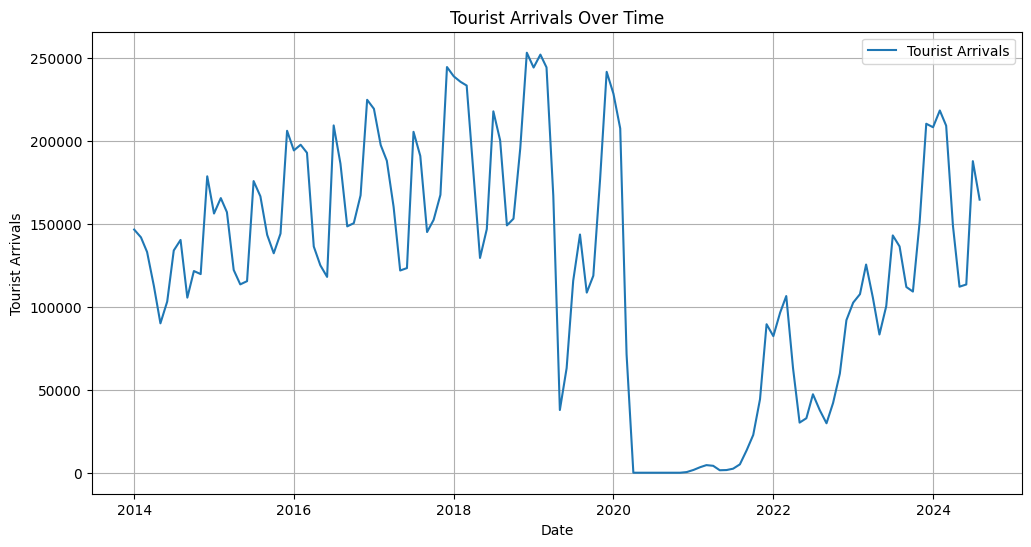

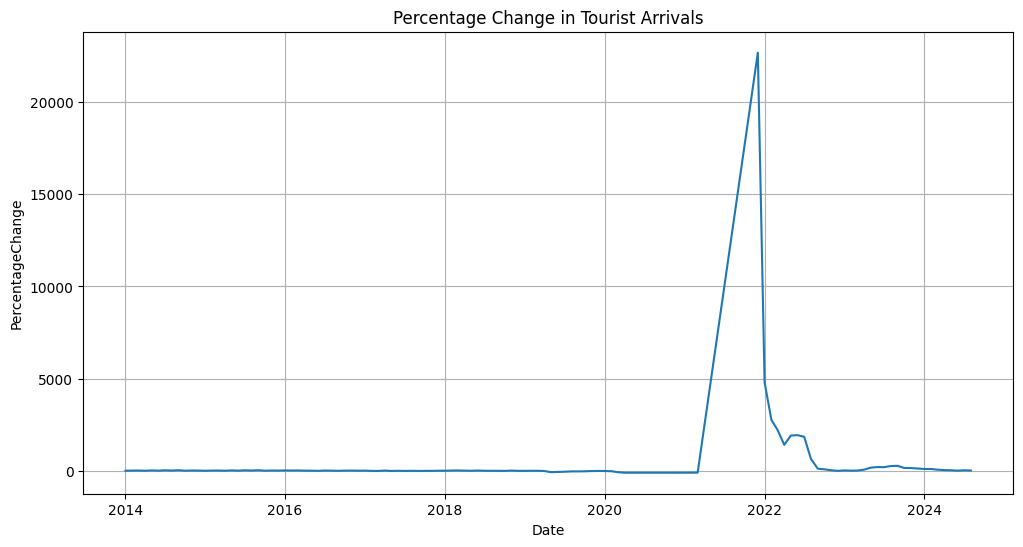

In [5]:
# tourist arrivals over time plot
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Arrivals'], label='Tourist Arrivals')
plt.xlabel('Date')
plt.ylabel('Tourist Arrivals')
plt.title('Tourist Arrivals Over Time')
plt.legend()
plt.grid(True)
plt.show()

# the percentage change in arrivals plot
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='Date', y='PercentageChange')
plt.title('Percentage Change in Tourist Arrivals')
plt.grid(True)
plt.show()


# 4. Feature Engineering

In [6]:
for i in range(1, 13):
    df[f'Arrivals_Lag_{i}'] = df['Arrivals'].shift(i)

df['Month_Num'] = df['Date'].dt.month
df['Year_Num'] = df['Date'].dt.year

df = df.dropna()

df.head()


,Year,Month,Arrivals,PercentageChange,Date,Arrivals_Lag_1,Arrivals_Lag_2,Arrivals_Lag_3,Arrivals_Lag_4,Arrivals_Lag_5,Arrivals_Lag_6,Arrivals_Lag_7,Arrivals_Lag_8,Arrivals_Lag_9,Arrivals_Lag_10,Arrivals_Lag_11,Arrivals_Lag_12,Month_Num,Year_Num
12,2015,January,156246,6.6,2015-01-01,178672.0,119727.0,121576.0,105535.0,140319.0,133971.0,103175.0,90046.0,112631.0,133048.0,141878.0,146575.0,1,2015
13,2015,February,165541,16.7,2015-02-01,156246.0,178672.0,119727.0,121576.0,105535.0,140319.0,133971.0,103175.0,90046.0,112631.0,133048.0,141878.0,2,2015
14,2015,March,157051,18.0,2015-03-01,165541.0,156246.0,178672.0,119727.0,121576.0,105535.0,140319.0,133971.0,103175.0,90046.0,112631.0,133048.0,3,2015
15,2015,April,122217,8.5,2015-04-01,157051.0,165541.0,156246.0,178672.0,119727.0,121576.0,105535.0,140319.0,133971.0,103175.0,90046.0,112631.0,4,2015
16,2015,May,113529,26.1,2015-05-01,122217.0,157051.0,165541.0,156246.0,178672.0,119727.0,121576.0,105535.0,140319.0,133971.0,103175.0,90046.0,5,2015


# 5. Features and Target Defining

In [7]:
features = [col for col in df.columns if col.startswith('Arrivals_Lag_')] + ['Month_Num', 'Year_Num']

X = df[features]
y = df['Arrivals']

# to check the shape of the feature set and target
print(f"Feature set shape: {X.shape}")
print(f"Target shape: {y.shape}")


Feature set shape: (108, 14)
Target shape: (108,)


# 6. Splitting the Data into Training and Testing Sets

In [8]:
# spliting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# displaying the shape of sets
print(f"Training set: {X_train.shape}")
print(f"Testing set: {X_test.shape}")


Training set: (86, 14)
Testing set: (22, 14)


# 7. Feature Scaling

In [9]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


# 8. Model Training

In [10]:
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test_scaled)

# 9. Model Evaluation

In [11]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2) Score: {r2}")


Mean Squared Error (MSE): 1627376966.0308092
R-squared (R2) Score: 0.6983373703399347


# 10. Actual vs. Predicted Values

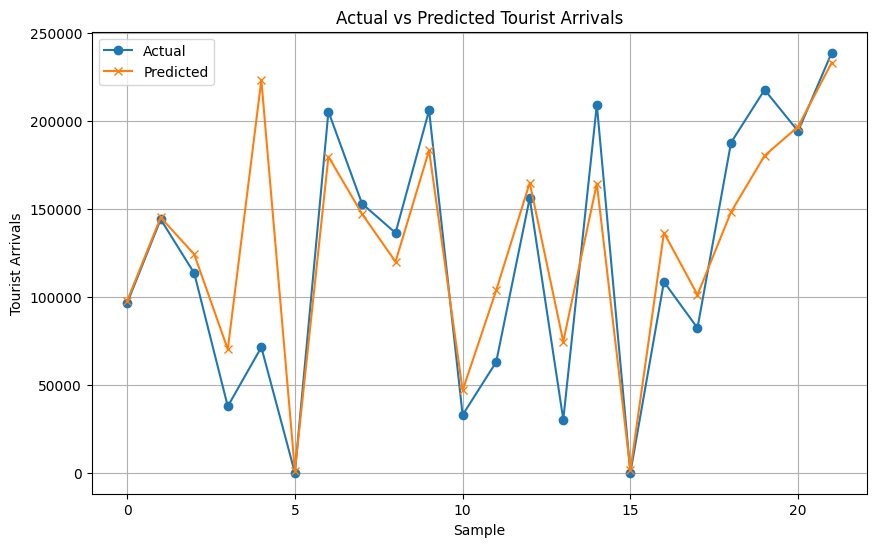

In [12]:
plt.figure(figsize=(10, 6))
plt.plot(y_test.values, label='Actual', marker='o')
plt.plot(y_pred, label='Predicted', marker='x')
plt.xlabel('Sample')
plt.ylabel('Tourist Arrivals')
plt.title('Actual vs Predicted Tourist Arrivals')
plt.legend()
plt.grid(True)
plt.show()
